# Random Forest - Practice

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [3]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints', 'hr_job.csv', 'RandomForest Practice.ipynb']

In [4]:
data = pd.read_csv("hr_job.csv")

In [5]:
data.head(5)

,ID,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,21,0.624000,1,0,2.0,3.0,4.0,3.0,NaN,4.0,0.0,31.372145,1
1,2,21,0.616795,1,0,2.0,3.0,4.0,0.0,NaN,NaN,1.0,63.988905,1
2,3,73,0.754000,1,0,2.0,3.0,4.0,0.0,NaN,NaN,0.0,19.000000,1
3,4,57,0.866000,1,0,0.0,5.0,4.0,9.0,4.0,4.0,5.0,53.000000,0
4,5,21,0.624000,1,1,0.0,4.0,4.0,5.0,3.0,4.0,5.0,108.000000,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17257 entries, 0 to 17256
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      17257 non-null  int64  
 1   city                    17257 non-null  int64  
 2   city_development_index  17257 non-null  float64
 3   gender                  17257 non-null  int64  
 4   relevent_experience     17257 non-null  int64  
 5   enrolled_university     17006 non-null  float64
 6   education_level         16962 non-null  float64
 7   major_discipline        15441 non-null  float64
 8   experience              17161 non-null  float64
 9   company_size            9603 non-null   float64
 10  company_type            9982 non-null   float64
 11  last_new_job            16928 non-null  float64
 12  training_hours          17257 non-null  float64
 13  target                  17257 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,17257.0,8629.000000,4981.811133,1.000,4315.00,8629.000000,12943.000000,17257.000
city,17257.0,72.991887,46.128232,1.000,21.00,83.000000,103.000000,180.000
city_development_index,17257.0,0.805103,0.128002,0.448,0.68,0.874349,0.920000,0.949
gender,17257.0,0.828417,0.488328,0.000,1.00,1.000000,1.000000,2.000
relevent_experience,17257.0,0.710726,0.453438,0.000,0.00,1.000000,1.000000,1.000
enrolled_university,17006.0,0.476891,0.825014,0.000,0.00,0.000000,1.000000,2.000
education_level,16962.0,3.108183,0.582475,1.000,3.00,3.000000,3.000000,5.000
major_discipline,15441.0,3.888543,0.581960,0.000,4.00,4.000000,4.000000,5.000
experience,17161.0,10.532370,8.291935,0.000,4.00,8.000000,15.000000,25.000
company_size,9603.0,4.259711,2.187910,1.000,3.00,4.000000,6.000000,8.000


<Axes: >

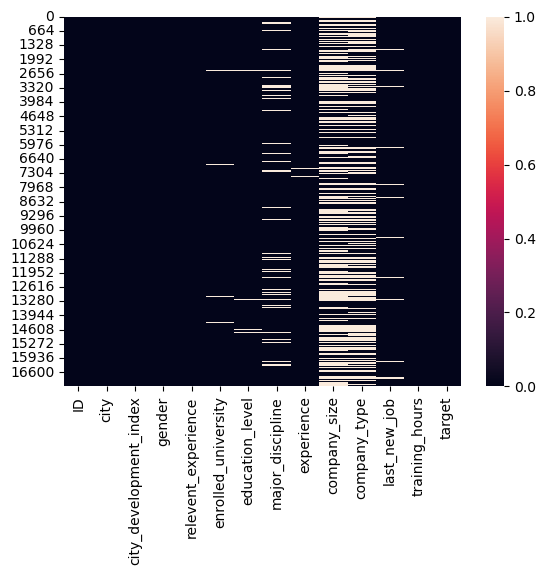

In [9]:
sns.heatmap(data.isnull())

### We shall drop features if it has more than 25 - 30% empty values.

In [11]:
null_percentages = data.isnull().mean() * 100
null_percentages = null_percentages[null_percentages > 0].sort_values(ascending = False)
for feature, null_percentage in null_percentages.items():
    print(f"{feature:<20} : {null_percentage}")

company_size         : 44.35301616735238
company_type         : 42.156805933823954
major_discipline     : 10.523265921075506
last_new_job         : 1.9064727357014546
education_level      : 1.7094512371791155
enrolled_university  : 1.4544822390913832
experience           : 0.55629599582778


In [14]:
data.drop(['company_size', 'company_type', 'ID'], axis = 1, inplace = True)

<Axes: >

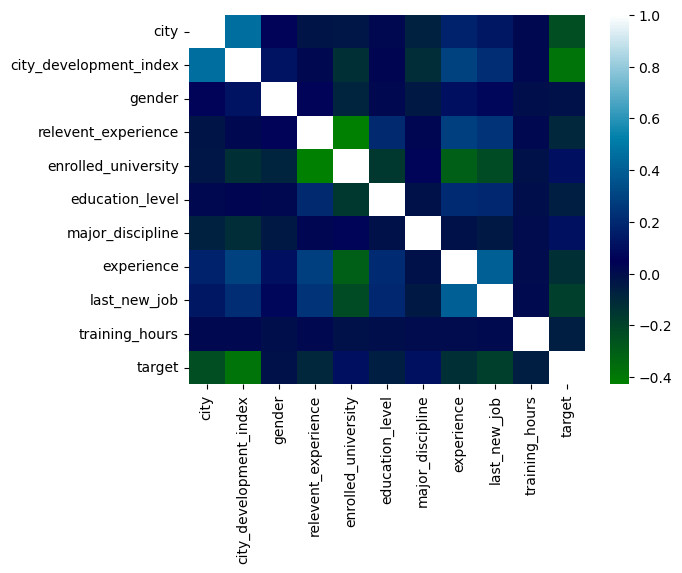

In [15]:
sns.heatmap(data.corr(), cmap = 'ocean')

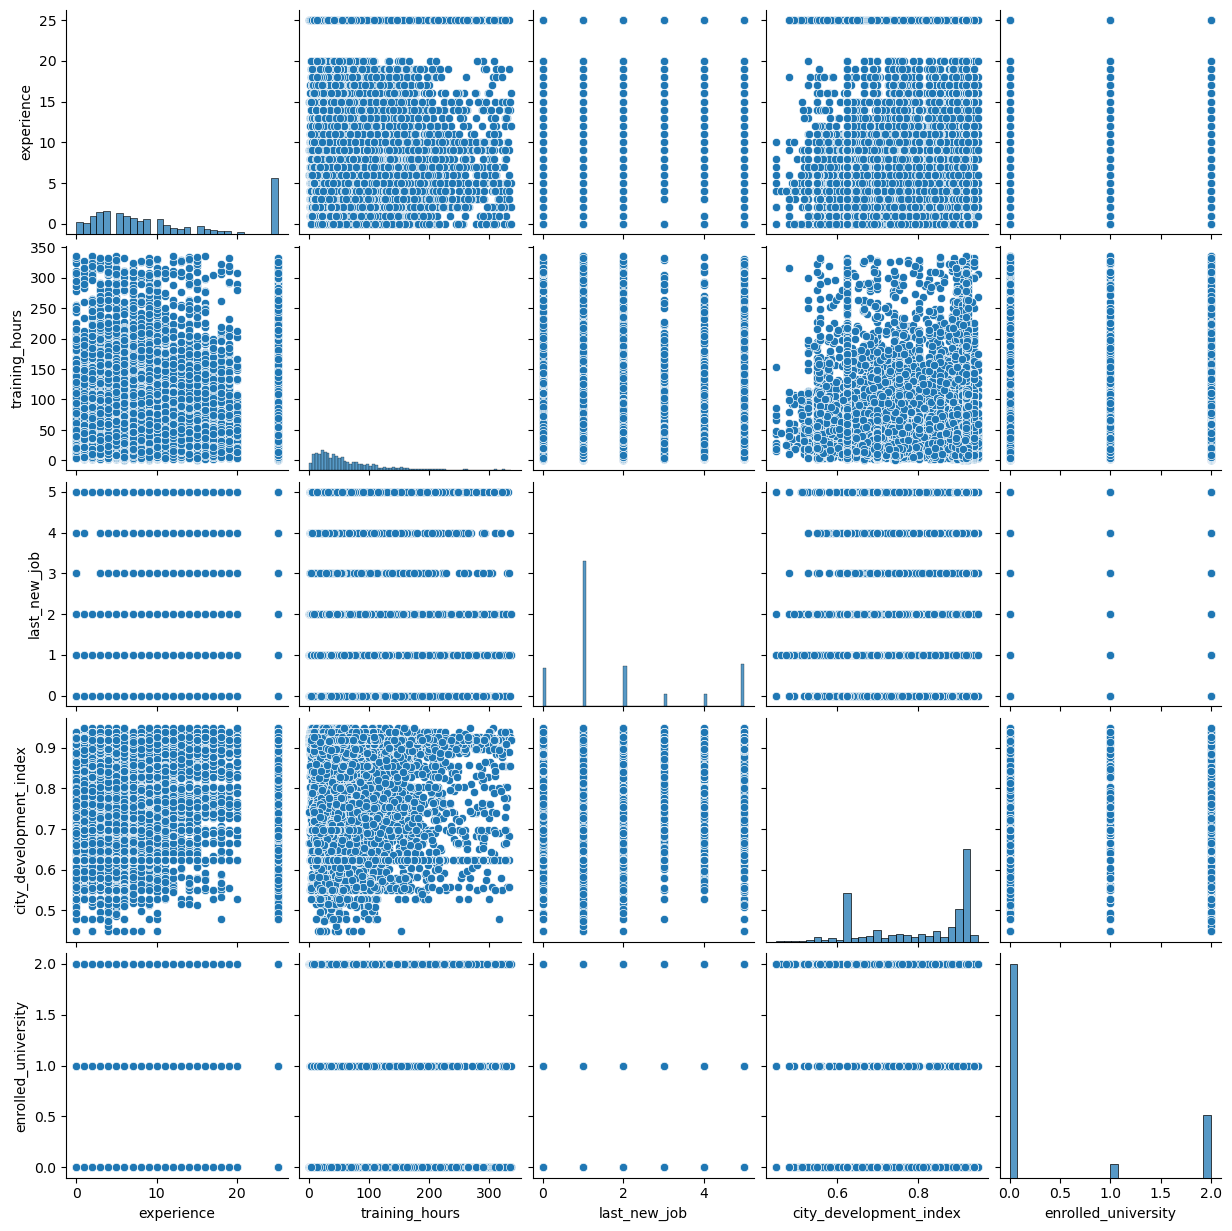

In [18]:
sns.pairplot(data[
    [
        'experience',
        'training_hours',
        'last_new_job',
        'city_development_index',
        'enrolled_university'
    ]
])
plt.show()

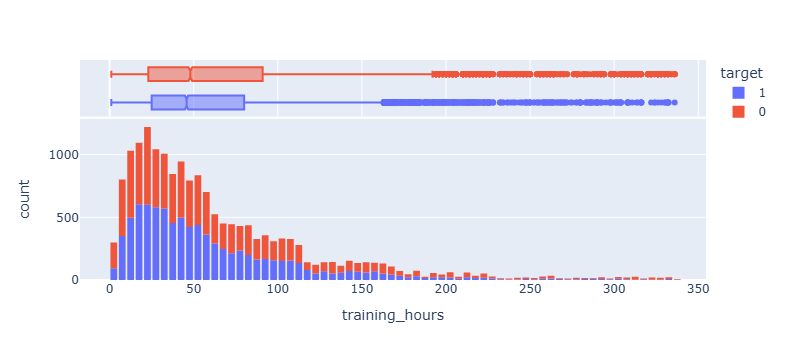

In [19]:
fig = ex.histogram(
    data,
    marginal = 'box',
    x = 'training_hours',
    color = 'target'
)
fig.update_layout(bargap = 0.2)

As seen in data.describe(), education_level has the same value for quartile range, so we will fill the empty values with median value.

In [20]:
data.education_level.fillna(3.0, inplace = True)

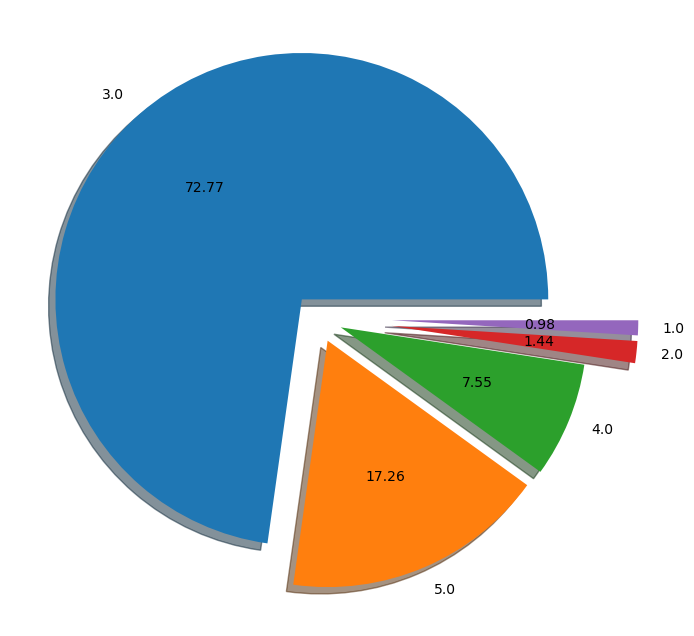

In [24]:
plt.figure(figsize = (15, 8))
plt.pie(
    data['education_level'].value_counts(),
    labels = data['education_level'].unique(),
    shadow=True,
    autopct = '%.2f',
    explode = [0.1, 0.1, 0.1, 0.3, 0.3]
)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

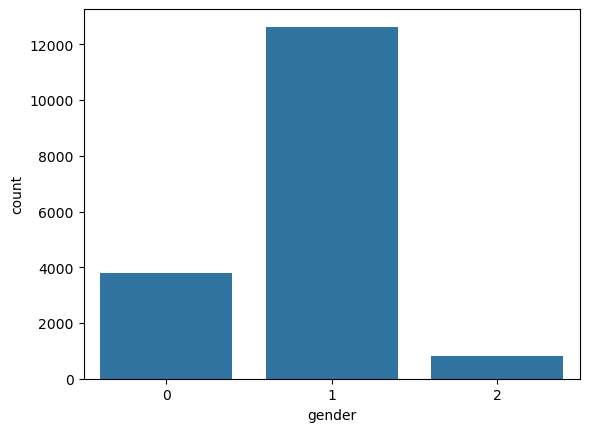

In [25]:
sns.countplot(data = data, x = 'gender')

In [ ]:
data